Kramer transitions

Let us consider a system with two identical stable states (ground states) separated by an energy barrier $E_b$. This system can easily be modeled with a one-dimensional three-state system, in which a particle can only transition into the neighboring state:

Left ⟺ Middle ⟺ Right

where the ‘Middle’ state corresponds to the energy barrier with energy $E_b$, and the ‘Left’ and ‘Right’ states have zero energy. At each step, the possible future states are only the present state and its neighboring states (e.g., a transition from ‘Left’ to ‘Right’ is not possible). This model is a simplified version of the very powerful model introduced in 1940 by Hans Kramers to estimate the frequencies of chemical transitions [3].



a. Simulate the system setting $E_b = 2kBT$ , starting at the ‘Left’ state and running the simulation for $10^5$ steps. Check the trajectories of the system and the equilibrium probability distributions. How many steps are necessary to reach the equilibrium distribution?

In [13]:
import numpy as np 
import matplotlib.pyplot as plt

The state probability function:

In [14]:
def probabilityDistribution(particleState,Eb,kB):
    z = 2+np.exp(-Eb/(kB))
    r = np.random.uniform(low=0.0, high=1.0, size=None)
    
    newState = None
    if (r < 1/z):
        newState = 0
    elif (r < (1/z + 1/z * np.exp(-Eb/(kB)))):
        newState = 1
    else:
        newState = 2


    if particleState == 0 and newState == 0:
        particleState = 0
    elif particleState == 0 and newState == 1:
        particleState = 1
    elif particleState == 2 and newState == 1:
        particleState = 1
    elif particleState == 2 and newState == 2:
        particleState = 2
    elif particleState == 1 and newState == 0:
        particleState = 0
    elif particleState == 1 and newState == 2:
        particleState = 2
    else:
        particleState == newState
    
    return particleState

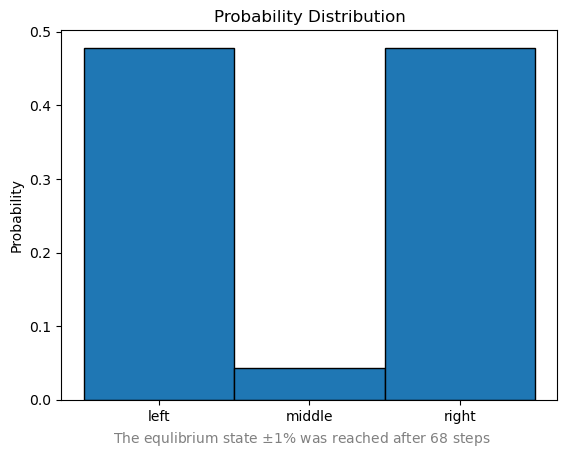

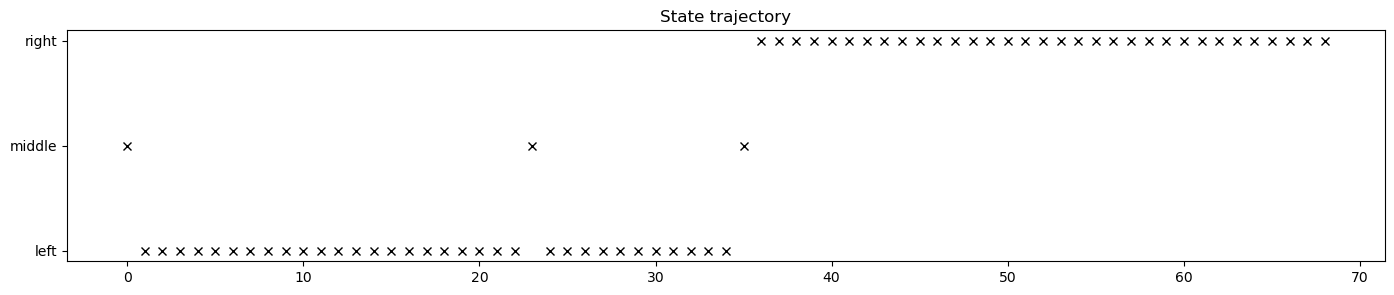

In [15]:
particles = 0
kB = 1
Eb = 2*kB
steps = 10000

evolutionParticle = []
state0 = 0
state1 = 0
state2 = 0
z = 2+np.exp(-Eb/(kB))
for step in range(steps):
    tmpParticle = particles
    newState = probabilityDistribution(tmpParticle,Eb,kB)
    particles = newState
    evolutionParticle.append(newState)
    if newState == 0:
        state0 += 1
    if newState == 1:
        state1 += 1
    if newState == 2:
        state2 += 1

    dist0 = state0/(step+1)
    dist2 = state2/(step+1)
    
    if (1/z - 0.01) < dist0 < (1/z + 0.01) and (1/z - 0.01) < dist2 < (1/z + 0.01):
        break

data = [0] * state0 + [1] * state1 + [2] * state2

# Create a histogram
plt.hist(data, bins=[-0.5, 0.5, 1.5, 2.5], edgecolor='black', density=True)
plt.ylabel('Probability')
plt.title('Probability Distribution')
plt.xticks([0, 1, 2], ['left', 'middle', 'right'])
plt.figtext(0.5, 0.02, f'The equlibrium state $\pm$1% was reached after {step} steps', ha='center', fontsize=10, color='gray')
plt.show()

# Create trajectories
stepsList = [i for i in range(step+1)]
plt.figure(figsize=(17, 3))
plt.yticks([0, 1, 2], ['left', 'middle', 'right'])
plt.plot(stepsList,evolutionParticle,'kx')
plt.title('State trajectory')
plt.show()


b. Vary $E_b$ and $T$ to observe their effect on the transition frequency between states and on the equilibrium distribution. Does this affect also the time it takes the system to reach the equilibrium distribution?



In [16]:
def frequencyCalculator(evolutionParticle):
    counter = 0
    currentState = evolutionParticle[0]
    timeList = []
    
    for i in range(len(evolutionParticle)):
        counter += 1

        if currentState == 0 and evolutionParticle[i] == 2:
            timeList.append(counter)
            counter = 0
            currentState = 2
            
        elif currentState == 2 and evolutionParticle[i] == 0:
            timeList.append(counter)
            counter = 0
            currentState = 0
        
        elif evolutionParticle[i] == 1 and evolutionParticle[i-1] == 2:
            currentState = 2

        elif evolutionParticle[i] == 1 and evolutionParticle[i-1] == 0:
            currentState = 0

        if i == len(evolutionParticle)-1:
            timeList.append(counter)
        
            
    
    return 1/np.mean(timeList)


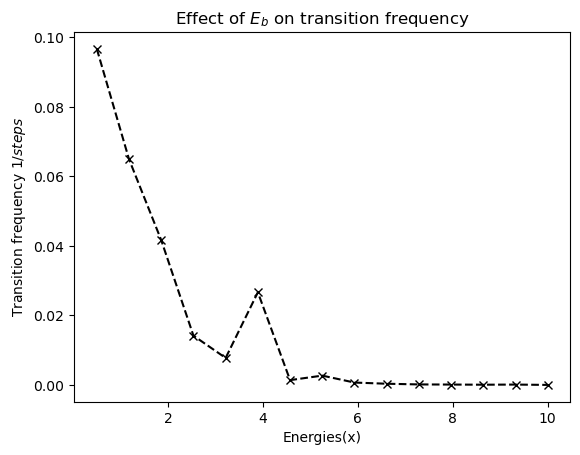

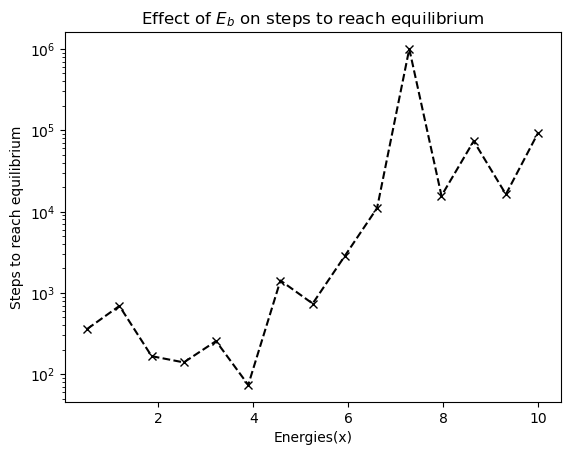

In [17]:
kB = 1
energies =np.linspace(0.5,10,15)
steps = 1000000

frequencyList=[]
equilSteps = []

for nrgy in range(len(energies)):
    Eb = energies[nrgy]*kB
    z = 2+np.exp(-Eb/(kB))
    
    particles = 0
    state0 = 0
    state1 = 0
    state2 = 0

    evolutionParticle = []

    for step in range(steps):
        tmpParticle = particles
        newState = probabilityDistribution(tmpParticle,Eb,kB)
        particles = newState
        evolutionParticle.append(newState)
        
        if newState == 0:
            state0 += 1
        if newState == 1:
            state1 += 1
        if newState == 2:
            state2 += 1
    
        dist0 = state0/(step+1)
        dist2 = state2/(step+1)
    
        if (1/z - 0.02) < dist0 < (1/z + 0.02) and (1/z - 0.02) < dist2 < (1/z + 0.02):
            break
    
    equilSteps.append(step)
    
       
    frequency = frequencyCalculator(evolutionParticle)
    frequencyList.append(frequency)

    



# plot Effect energy on transition frequency
plt.plot(energies,frequencyList,'kx--')
plt.ylabel('Transition frequency $1/steps$')
plt.xlabel('Energies(x)')
plt.title('Effect of $E_b$ on transition frequency')
plt.show()

# plot effect of energy on reaching equilibrium
plt.semilogy(energies,equilSteps,'kx--')
plt.ylabel('Steps to reach equilibrium')
plt.xlabel('Energies(x)')
plt.title('Effect of $E_b$ on steps to reach equilibrium')
plt.show()


First of all note, that the changes in temperature do not affect this system. Thus there have been made changes to the energy by a coefficient, which makes it possible to look at different energies. This holds for the rest of the exercises. The transition frequency is lower with higher energies, this is due to the fact that the energy represents a potential barrier which is less likely to overcome the higher the energy is. Thus it is not very surprising, that it takes longer time to reach equilibrium for higher energies.

c. Start the simulation in the ‘Left’ state and stop it whenever it reaches the ‘Right’ state, recording the corresponding escape time. Repeat this numerical experiment many times in order to determine the escape time distribution for different values of $E_b$ and $T$.

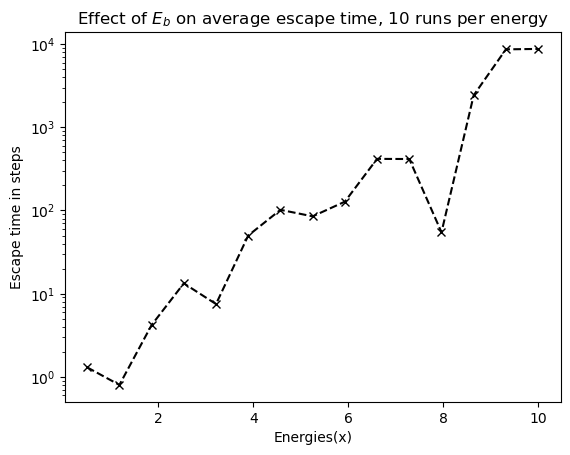

In [18]:
kB = 1
energies =np.linspace(0.5,10,15)
steps = 1000000
runs = 10

escapeTimeList = []

for nrgy in range(len(energies)):
    Eb = energies[nrgy]*kB
    z = 2+np.exp(-Eb/(kB))
    
    particleState = 0
    state2 = 0

    escapeTimeSubList = []

    for run in range(runs):
        for step in range(steps):
            tmpParticle = particleState
            newState = probabilityDistribution(tmpParticle,Eb,kB)
            particleState = newState
            
            if newState == 2:
                break
        
        escapeTimeSubList.append(step)
    avgSubList = np.mean(escapeTimeSubList)
    escapeTimeList.append(avgSubList)
    



# plot Effect energy on transition frequency
plt.semilogy(energies,escapeTimeList,'kx--')
plt.ylabel('Escape time in steps')
plt.xlabel('Energies(x)')
plt.title('Effect of $E_b$ on average escape time, 10 runs per energy')
plt.show()




As already stated in anser to task b) the higher the energy $E_b$ the higher the potential barrier to overcome for the particle to change its state. Thus the escape time grow rapidly for higher energies.